In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import requests
import time
import sys
import os
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint
sys.path.append('../')
from api_keys import sportsio_key
print(sportsio_key)

ModuleNotFoundError: No module named 'api_keys'

In [130]:
#Import the files

stats_df=pd.read_csv('Resources/raw.csv')
static_data=pd.read_csv('Resources/static_data.csv')

#merge the static data with yearly data 

stats_merged_df=pd.merge(stats_df, static_data, on='Player')

#Clean up the data by changing to float from int
stats_merged_df["DrAge"]=stats_merged_df["DrAge"].astype(float)
stats_merged_df["Rnd"]=stats_merged_df["Rnd"].astype(int)
stats_merged_df["Pick"]=stats_merged_df["Pick"].astype(float)
stats_merged_df.head()

,Player,player_year,season_year,Tm_x,Age,G,GS,Wins,Losses,Yds,TD,Y/A,Y/G,Rate,Salary,Rnd,Pick,DrAge,Tm_y,College/Univ
0,A.J. Feeley,1,2001,PHI,24,1,0,0,0,143,2,10.2,143.0,114.0,319325,5,155.0,24.0,PHI,Oregon
1,A.J. Feeley,2,2002,PHI,25,6,5,4,1,1011,6,6.6,168.5,75.4,389000,5,155.0,24.0,PHI,Oregon
2,A.J. Feeley,3,2004,MIA,27,11,8,3,5,1893,11,5.3,172.1,61.7,3455000,5,155.0,24.0,PHI,Oregon
3,A.J. Feeley,4,2006,PHI,29,2,0,0,0,342,3,9.0,171.0,122.9,1540000,5,155.0,24.0,PHI,Oregon
4,A.J. Feeley,5,2007,PHI,30,3,2,0,2,681,5,6.6,227.0,61.2,190588,5,155.0,24.0,PHI,Oregon


Index(['Player', 'player_year', 'season_year', 'Tm_x', 'Age', 'G', 'GS',
       'Wins', 'Losses', 'Yds', 'TD', 'Y/A', 'Y/G', 'Rate', 'Salary', 'Rnd',
       'Pick', 'DrAge', 'Tm_y', 'College/Univ'],
      dtype='object')


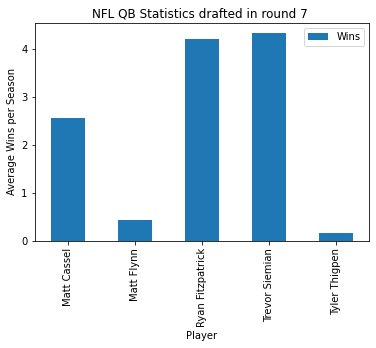

Round    5
Wins     5
dtype: int64

<Figure size 432x288 with 0 Axes>

In [133]:
pprint(stats_merged_df.columns)
#Pick the columns we need to analyze
stats_merged_df1= stats_merged_df[["Player","Tm_x", "Wins","Losses", "Rate", "Salary","Rnd","Pick","DrAge","College/Univ"]].copy()

stats_merged_df1.count()
stats_merged_df1.head(10)

Round_df=stats_merged_df.loc[stats_merged_df['Rnd'] == 7.0]

Player_Group=(Round_df).groupby("Player")
#touchdowns=Player_Group["TD"].sum()
#Player_stats_DF=pd.DataFrame({})
Round_df=pd.DataFrame({"Round":Player_Group["Rnd"], "Wins":Player_Group["Wins"].mean()})

Round_df.sort_values(by=["Wins"], ascending=False).head()

Round_df.plot(kind="bar")

# Set a title for the chart
plt.title("NFL QB Statistics drafted in round 7 ")
plt.xlabel("Player")
plt.ylabel("Average Wins per Season")
plt.savefig('Output/Round7 wins .png')
plt.show()

plt.tight_layout()
 # df=pd.DataFrame({"Purchase Count by Player":Players_Group["SN"].count(),"Average Purchase Price":Players_Group["Price"].sum()/Players_Group["SN"].count(), "Total Purchase Value":Players_Group["Price"].sum()})

#Age_demograohics_df=pd.DataFrame({"Total Count":Totals,"Average Purchase Price":Average_Purchase_Price, "Total Purchaase Value":Totals*Average_Purchase_Price, "Avg Purchase per Person":Totals*Average_Purchase_Price/UniqueTotals})
#print(Player_Group)
#stats_merged_df.head(10)
Round_df.count()

In [134]:
Round_df

,Round,Wins
Player,,
Matt Cassel,"(Matt Cassel, [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7...",2.571429
Matt Flynn,"(Matt Flynn, [7, 7, 7, 7, 7, 7, 7])",0.428571
Ryan Fitzpatrick,"(Ryan Fitzpatrick, [7, 7, 7, 7, 7, 7, 7, 7, 7,...",4.214286
Trevor Siemian,"(Trevor Siemian, [7, 7, 7])",4.333333
Tyler Thigpen,"(Tyler Thigpen, [7, 7, 7, 7, 7, 7])",0.166667


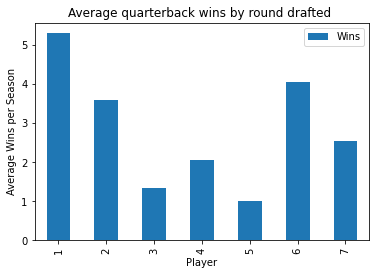

In [135]:
Round_group=stats_merged_df1.groupby("Rnd")

Round_df=pd.DataFrame({"Wins":Round_group["Wins"].mean()})

Round_df.sort_values(by=["Rnd"], ascending=True).head()

Round_df.plot(kind="bar")

# Set a title for the chart
plt.title("Average quarterback wins by round drafted ")
plt.xlabel("Player")
plt.ylabel("Average Wins per Season")
plt.savefig('Output/ AverageWins.png')
plt.show()

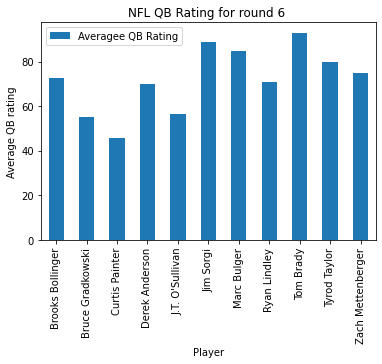

In [136]:

Round_df=stats_merged_df.loc[stats_merged_df['Rnd'] == 6.0]

Player_Group=(Round_df).groupby("Player")
#touchdowns=Player_Group["TD"].sum()
#Player_stats_DF=pd.DataFrame({})
Round_df=pd.DataFrame({ "Averagee QB Rating":Player_Group["Rate"].mean()})

Round_df.sort_values(by=["Player"], ascending=False).head()

Round_df.plot(kind="bar")

# Set a title for the chart
plt.title("NFL QB Rating for round 6 ")
plt.xlabel("Player")
plt.ylabel("Average QB rating")
plt.savefig('Output/QB rating round 6.png')
plt.show()


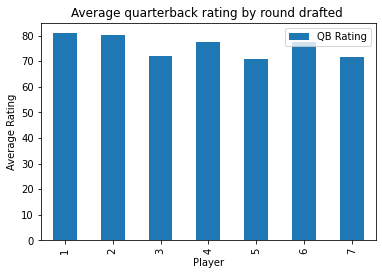

In [137]:
Round_group=stats_merged_df1.groupby("Rnd")

QB_ratingRound_df=pd.DataFrame({"QB Rating":Round_group["Rate"].mean()})
QB_ratingRound_df.sort_values(by=["Rnd"], ascending=True).head()
QB_ratingRound_df.plot(kind="bar")

# Set a title for the chart
plt.title("Average quarterback rating by round drafted ")
plt.xlabel("Player")
plt.ylabel("Average Rating")
plt.savefig('Output/ AverageQBRating.png')
plt.show()



In [138]:
Round_df

,Averagee QB Rating
Player,
Brooks Bollinger,72.660000
Bruce Gradkowski,55.200000
Curtis Painter,45.800000
Derek Anderson,70.020000
J.T. O'Sullivan,56.433333
Jim Sorgi,88.675000
Marc Bulger,84.537500
Ryan Lindley,71.033333
Tom Brady,92.925000


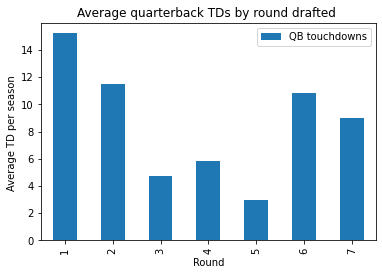

,QB touchdowns
Rnd,
1,15.212418
2,11.512195
3,4.741176
4,5.843137
5,3.000000
6,10.837838
7,8.977273


In [139]:
Round_group=stats_merged_df.groupby("Rnd")

TouchdownRound_df=pd.DataFrame({"QB touchdowns":Round_group["TD"].mean()})
TouchdownRound_df.sort_values(by=["Rnd"], ascending=True).head()
TouchdownRound_df.plot(kind="bar")

# Set a title for the chart
plt.title("Average quarterback TDs by round drafted ")
plt.xlabel("Round")
plt.ylabel("Average TD per season ")
plt.savefig('Output/ AverageTD.png')
plt.show()
TouchdownRound_df

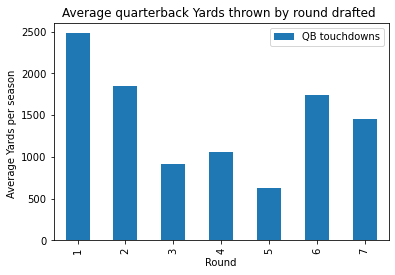

,QB touchdowns
Rnd,
1,2479.029412
2,1843.841463
3,917.611765
4,1053.666667
5,624.722222
6,1742.594595
7,1453.113636


In [140]:
Round_group=stats_merged_df.groupby("Rnd")

YardsRound_df=pd.DataFrame({"QB touchdowns":Round_group["Yds"].mean()})
YardsRound_df.sort_values(by=["Rnd"], ascending=True).head()
YardsRound_df.plot(kind="bar")

# Set a title for the chart
plt.title("Average quarterback Yards thrown by round drafted ")
plt.xlabel("Round")
plt.ylabel("Average Yards per season ")
plt.savefig('Output/ AverageYDS.png')
plt.show()
YardsRound_df

In [141]:
player_group=stats_merged_df1.groupby("Player")
years_played=player_group["Player"].count()


In [142]:
#Collect Stats per Player
player_summary=player_group.describe()
#Check the column type
player_summary.head()
#Next line is to remove limit on number of colujmns or rows to be displayed 
#pd.set_option("display.max_rows", None, "display.max_columns", None)

Wins                                                  Losses  \
              count      mean       std  min  25%   50%    75%   max  count   
Player                                                                        
A.J. Feeley     6.0  1.333333  1.751190  0.0  0.0   0.5   2.50   4.0    6.0   
A.J. McCarron   5.0  0.400000  0.894427  0.0  0.0   0.0   0.00   2.0    5.0   
Aaron Rodgers  16.0  7.875000  4.842520  0.0  5.5  10.0  11.25  14.0   16.0   
Alex Smith     14.0  7.071429  3.561855  2.0  5.0   6.5  10.50  13.0   14.0   
Andrew Luck     6.0  8.833333  3.544949  2.0  8.5  10.5  11.00  11.0    6.0   

                         ...   Pick        DrAge                               \
                   mean  ...    75%    max count  mean  std   min   25%   50%   
Player                   ...                                                    
A.J. Feeley    1.666667  ...  155.0  155.0   6.0  24.0  0.0  24.0  24.0  24.0   
A.J. McCarron  0.400000  ...  164.0  164.0   5.0  23.0  0.0  23.0  23.0  23.0   
Aaron Rodgers  3.937500  ...   24.0   24.0  16.0  21.0  0.0  21.0  21.0  21.0   
Alex Smith     4.785714  ...    1.0    1.0  14.0  21.0  0.0  21.0  21.0  21.0   
Andrew Luck    5.500000  ...    1.0    1.0   6.0  22.0  0.0  22.0  22.0  22.0   

                           
                75%   max  
Player                     
A.J. Feeley    24.0  24.0  
A.J. McCarron  23.0  23.0  
Aaron Rodgers  21.0  21.0  
Alex Smith     21.0  21.0  
Andrew Luck    22.0  22.0  

[5 rows x 56 columns]

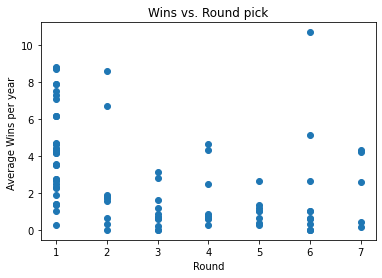

In [143]:
plt.scatter(player_summary["Rnd"]["mean"],player_summary["Wins"]["mean"])
plt.title("Wins vs. Round pick")
plt.xlabel("Round")
ylim=(0, player_summary["Wins"]["mean"].max()+1000)
plt.ylabel("Average Wins per year ")
plt.savefig('Output/ SP Wins vs. Round.png')
plt.show()

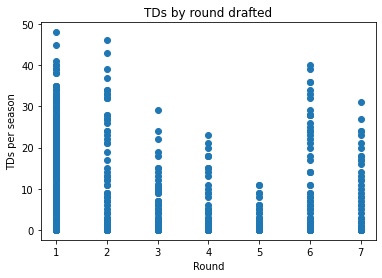

In [128]:
plt.scatter(stats_merged_df['Rnd'], stats_merged_df['TD'])

plt.xlabel("Round")
plt.ylabel("TDs per season")
plt.title('TDs by round drafted')
plt.savefig('Output/ SP TDs vs. Round.png')

plt.show()

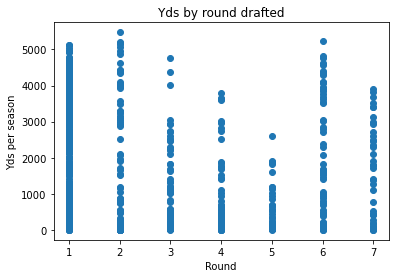

In [127]:
plt.scatter(stats_merged_df['Rnd'], stats_merged_df['Yds'])

plt.xlabel("Round")
plt.ylabel("Yds per season")
plt.title('Yds by round drafted')
plt.savefig('Output/ SP Yds vs. Round.png')
plt.show()

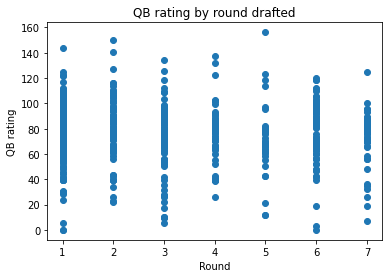

In [126]:
plt.scatter(stats_merged_df['Rnd'], stats_merged_df['Rate'])

plt.xlabel("Round")
plt.ylabel("QB rating")
plt.title('QB rating by round drafted')
plt.savefig('Output/ SP QB rating vs. Round.png')
plt.show()